In [2]:
import pandas as pd
import numpy as np
import statistics
from datetime import datetime
import datetime
import random
import itertools
from scipy.stats import norm
#import seaborn as sns
import math
import random
import sklearn
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds

In [3]:
#Lauras path
#data= pd.read_csv(r'C:\Users\moreno.l.5\Procter and Gamble\Idigoras, Anne - Project\Shipments\total shipments.csv')
#Annes path
df= pd.read_csv(r'C:\Users\idigoras.a\OneDrive - Procter and Gamble\05. Trainings&Acces\FODS 3\Project\Shipments\shipments_2022_2023_2024_Fabric_Baby_Hair.csv')

df = df.drop(columns=['Category'])
df= df.rename(columns={'Day Date (Real)': 'Date'})
categories = df['Sub Sector'].unique()
#df = df[df['Sub Sector'] == 'FABRIC']
df.head()


,Sub Sector,Shipment MSU Internal,Date
0,HAIR,0.1122,2022-01-03 00:00:00
1,HAIR,0.0346,2022-01-04 00:00:00
2,HAIR,0.0064,2022-01-05 00:00:00
3,HAIR,0.0049,2022-01-07 00:00:00
4,HAIR,0.0028,2022-01-10 00:00:00


In [4]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

print(df)

     Sub Sector  Shipment MSU Internal       Date
0          HAIR                 0.1122 2022-01-03
1          HAIR                 0.0346 2022-01-04
2          HAIR                 0.0064 2022-01-05
3          HAIR                 0.0049 2022-01-07
4          HAIR                 0.0028 2022-01-10
...         ...                    ...        ...
4641       HAIR                 4.8828 2024-05-17
4642       HAIR                -0.0028 2024-05-20
4643       HAIR                 5.0665 2024-05-21
4644       HAIR                 2.2694 2024-05-22
4645       HAIR                 2.0969 2024-05-23

[4646 rows x 3 columns]


In [5]:

# Pivot the DataFrame
df = df.pivot_table(index='Date', columns='Sub Sector', values='Shipment MSU Internal', aggfunc='sum')
# Fill NaN values with 0
df= df.fillna(0)
print(df)


Sub Sector     BABY   FABRIC     HAIR
Date                                 
2022-01-03  10.1881  12.5983  12.2046
2022-01-04   2.5806   6.8322   3.6671
2022-01-05   3.8445   9.9248   2.4512
2022-01-06   0.0071   0.0000   0.0000
2022-01-07   5.5063   9.5818   6.1986
...             ...      ...      ...
2024-05-17   7.9130   6.9862   6.9411
2024-05-20   0.7509   0.0000  -0.0065
2024-05-21   2.6287   9.2402   8.0431
2024-05-22   6.8281   1.1295   3.1925
2024-05-23   1.8003   3.4271   2.9701

[697 rows x 3 columns]


In [6]:
df = df.resample('W').sum()

print(df)


Sub Sector     BABY   FABRIC     HAIR
Date                                 
2022-01-09  22.9573  41.0606  24.5215
2022-01-16  25.3695  31.5509  11.5940
2022-01-23  24.1727  42.6518  21.6314
2022-01-30  18.1986  31.6521  37.4259
2022-02-06  22.9444  29.4992  24.4354
...             ...      ...      ...
2024-04-28  16.5507  31.1470  19.1727
2024-05-05  16.4453  21.1381  14.7862
2024-05-12  19.2233  17.2099  19.2639
2024-05-19  20.7189  24.5351  20.3170
2024-05-26  12.0080  13.7968  14.1992

[125 rows x 3 columns]


In [7]:
df = df.reset_index()

c:\Users\idigoras.a\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
10:58:37 - cmdstanpy - INFO - Chain [1] start processing
10:58:37 - cmdstanpy - INFO - Chain [1] done processing
10:58:38 - cmdstanpy - INFO - Chain [1] start processing
10:58:38 - cmdstanpy - INFO - Chain [1] done processing
10:58:39 - cmdstanpy - INFO - Chain [1] start processing
10:58:39 - cmdstanpy - INFO - Chain [1] done processing


               FABRIC       BABY       HAIR
2024-05-31  15.365676  14.733591  21.156558
2024-06-30  21.763235  15.064566  17.736502
2024-07-31  21.008068  22.268460  24.154329


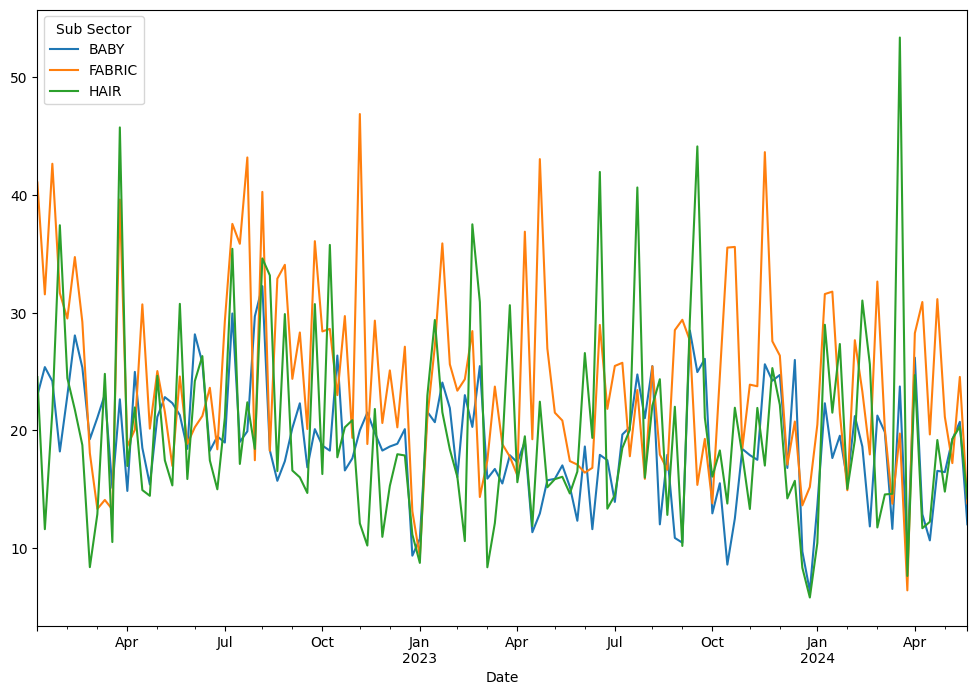

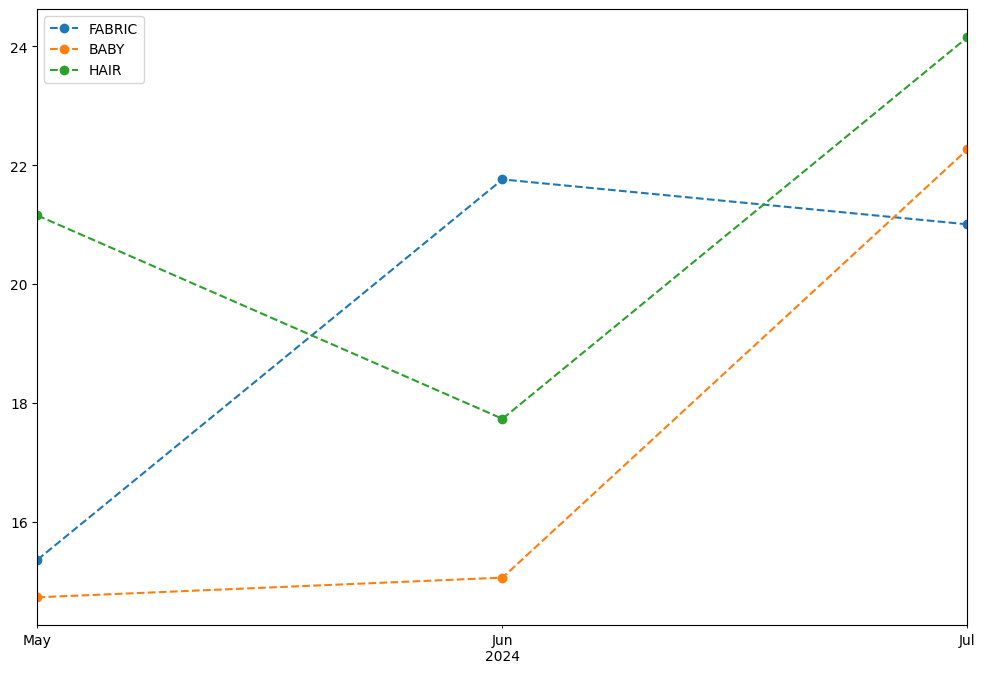

In [8]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Drop rows with missing values in the 'Date' column
df.dropna(subset=['Date'], inplace=True)

# Define the hierarchy based on the individual subgroups
hierarchy = {'FABRIC': ['FABRIC'], 'BABY': ['BABY'], 'HAIR': ['HAIR']}

# Prepare the data
y = df.set_index('Date')

# Perform hierarchical time series forecasting
forecast = pd.DataFrame()

for group, subgroups in hierarchy.items():
    group_data = y[subgroups].reset_index()
    group_data.columns = ['ds', 'y']
    
    model = Prophet()
    model.fit(group_data)
    
    future = model.make_future_dataframe(periods=3, freq='M')
    group_forecast = model.predict(future)
    
    forecast[group] = group_forecast['yhat'].tail(3)

# Set the index of the forecast DataFrame
last_date = y.index[-1]
forecast.index = pd.date_range(start=last_date, periods=3, freq='M')

print(forecast)

# Plot the historical data
y.plot(figsize=(12, 8))

# Plot the forecasts
forecast.plot(figsize=(12, 8), linestyle='--', marker='o')

plt.show()


10:58:40 - cmdstanpy - INFO - Chain [1] start processing
10:58:41 - cmdstanpy - INFO - Chain [1] done processing
10:58:41 - cmdstanpy - INFO - Chain [1] start processing
10:58:42 - cmdstanpy - INFO - Chain [1] done processing
10:58:42 - cmdstanpy - INFO - Chain [1] start processing
10:58:42 - cmdstanpy - INFO - Chain [1] done processing


Average MAPE for FABRIC: 0.2811669125924021


10:58:43 - cmdstanpy - INFO - Chain [1] start processing
10:58:43 - cmdstanpy - INFO - Chain [1] done processing


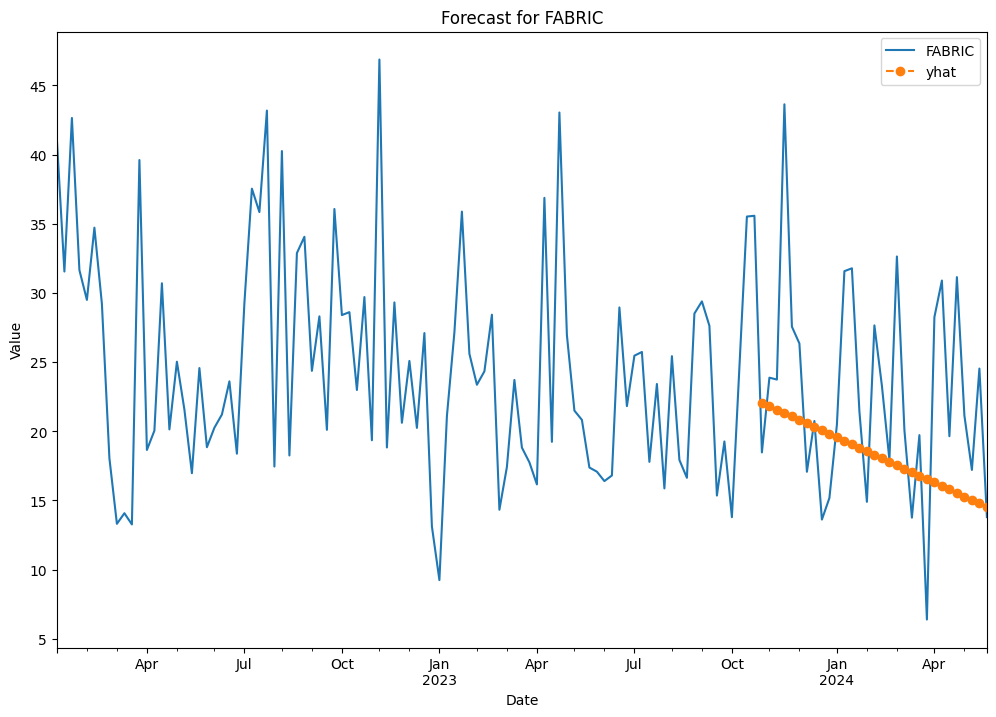

10:58:44 - cmdstanpy - INFO - Chain [1] start processing
10:58:44 - cmdstanpy - INFO - Chain [1] done processing
10:58:45 - cmdstanpy - INFO - Chain [1] start processing
10:58:45 - cmdstanpy - INFO - Chain [1] done processing
10:58:46 - cmdstanpy - INFO - Chain [1] start processing
10:58:46 - cmdstanpy - INFO - Chain [1] done processing


Average MAPE for BABY: 0.3434778133127419


10:58:47 - cmdstanpy - INFO - Chain [1] start processing
10:58:47 - cmdstanpy - INFO - Chain [1] done processing


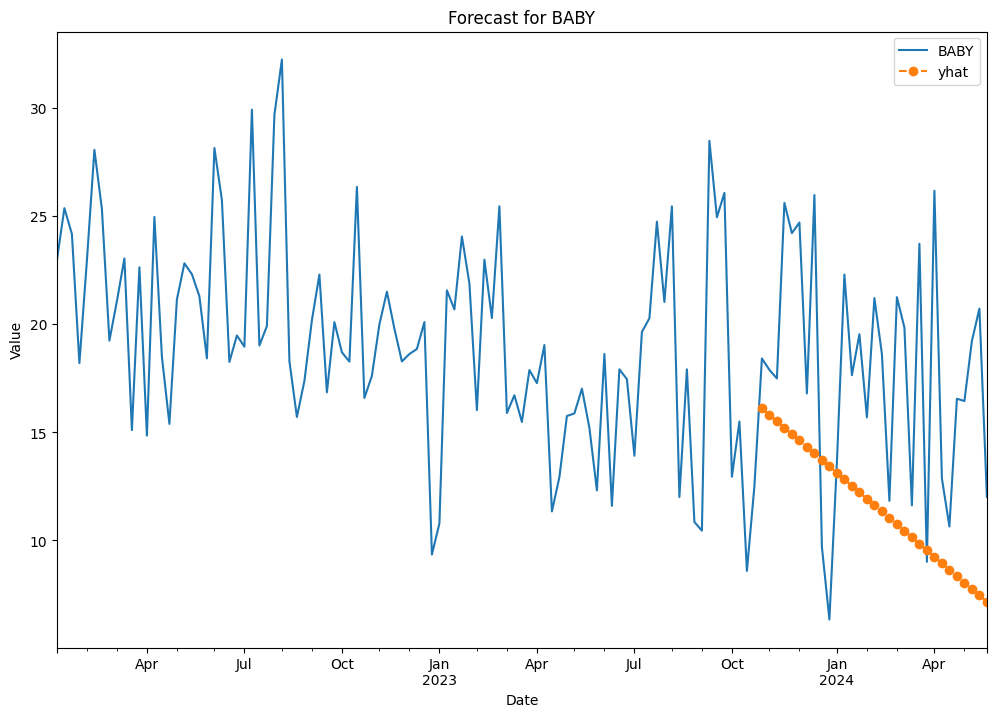

10:58:48 - cmdstanpy - INFO - Chain [1] start processing
10:58:48 - cmdstanpy - INFO - Chain [1] done processing
10:58:49 - cmdstanpy - INFO - Chain [1] start processing
10:58:49 - cmdstanpy - INFO - Chain [1] done processing
10:58:50 - cmdstanpy - INFO - Chain [1] start processing
10:58:50 - cmdstanpy - INFO - Chain [1] done processing


Average MAPE for HAIR: 0.6345050801628062


10:58:51 - cmdstanpy - INFO - Chain [1] start processing
10:58:51 - cmdstanpy - INFO - Chain [1] done processing


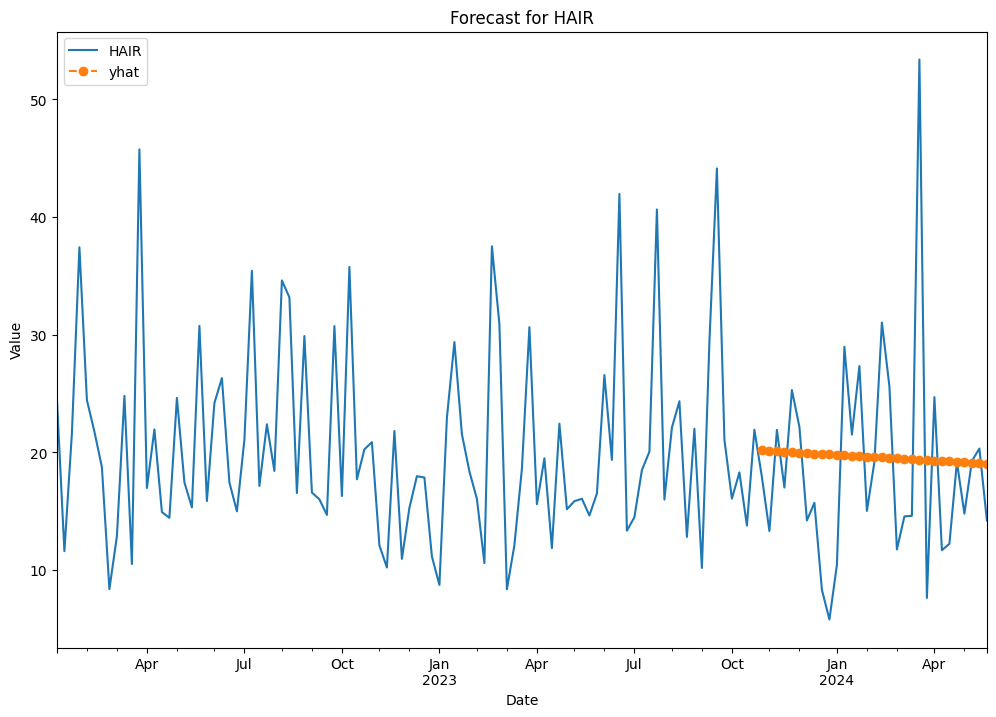


MAPE for each subgroup:
FABRIC: 0.2811669125924021
BABY: 0.3434778133127419
HAIR: 0.6345050801628062


In [9]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

# Assuming you have loaded your data into a DataFrame named df
# Drop rows with missing values in the 'Date' column
df.dropna(subset=['Date'], inplace=True)

# Define the hierarchy based on the individual subgroups
hierarchy = {'FABRIC': ['FABRIC'], 'BABY': ['BABY'], 'HAIR': ['HAIR']}

# Prepare the data
#y = df.set_index('Date')

# Initialize a dictionary to store the MAPE for each subgroup
mape_dict = {}

for group, subgroups in hierarchy.items():
    group_data = y[subgroups].reset_index()
    group_data.columns = ['ds', 'y']
    
    # Replace NaN values with 0
   # group_data['y'] = group_data['y'].fillna(method='ffill')

    
    # Initialize the TimeSeriesSplit with 3 splits
    tscv = TimeSeriesSplit(n_splits=3)


    mape_scores = []
    
    for train_index, test_index in tscv.split(group_data):
        # Split the data into train and test subsets based on the indices
        train_data = group_data.iloc[train_index]
        test_data = group_data.iloc[test_index]
        
        model = Prophet()
        model.fit(train_data)
        
        future = model.make_future_dataframe(periods=len(test_data), freq='M')
        group_forecast = model.predict(future)
        
        forecast = group_forecast['yhat'][-len(test_data):]
        actual = test_data['y']
        
        # Calculate MAPE
        mape = mean_absolute_percentage_error(actual, forecast)
        mape_scores.append(mape)
    
    # Calculate the average MAPE across the splits
    avg_mape = sum(mape_scores) / len(mape_scores)
    mape_dict[group] = avg_mape
    
    # Print the average MAPE for each subgroup
    print(f"Average MAPE for {group}: {avg_mape}")

    # Plot the historical data
    y[subgroups].plot(figsize=(12, 8))
    
    # Plot the forecasts for the last split
    model = Prophet()
    model.fit(group_data.iloc[train_index])
    future = model.make_future_dataframe(periods=len(test_data), freq='M')
    group_forecast = model.predict(future)
    forecast = group_forecast['yhat'][-len(test_data):]
    forecast.index = test_data['ds']
    forecast.plot(figsize=(12, 8), linestyle='--', marker='o')
    
    plt.title(f"Forecast for {group}")
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.legend()
    plt.show()

# Print the MAPE for each subgroup
print("\nMAPE for each subgroup:")
for group, mape in mape_dict.items():
    print(f"{group}: {mape}")



In [10]:
df.head()

Sub Sector,Date,BABY,FABRIC,HAIR
0,2022-01-09,22.9573,41.0606,24.5215
1,2022-01-16,25.3695,31.5509,11.5940
2,2022-01-23,24.1727,42.6518,21.6314
3,2022-01-30,18.1986,31.6521,37.4259
4,2022-02-06,22.9444,29.4992,24.4354
